## Planet Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib import colormaps as cm
import pandas as pd

In [5]:

names = ['g', 'P', 'rho', 'r', 'T', 'Tm', 'Cp', 'alpha', 'gamma', 'Kt', 'Ka', 'G', 'sigma', 'phase']

titles =  [
    'Gravity', 'Pressure', 'Density', 'Temperature', 'Melt Temperature', 'Heat Capacity',
    'Thermal Expansivity', 'Grüneisen Parameter', 'Isothermal Bulk Modulus', 
    'Adiabatic Bulk Modulus', 'Shear Modulus', 'Electrical Conductivity', 'Material Phase Number'
]

profs = [
    'M1_Fe30_sFe6-5_pprofs.res', 'M1_Fe60_sFe6-5_pprofs.res', 'M2_Fe30_sFe6-5_pprofs.res',
    'M2_Fe60_sFe6-5_pprofs.res', 'M3_Fe30_sFe6-5_pprofs.res', 'M3_Fe60_sFe6-5_pprofs.res',
    'M4_Fe30_sFe6-5_pprofs.res', 'M4_Fe60_sFe6-5_pprofs.res', 'M5_Fe30_sFe6-5_pprofs.res',
    'M5_Fe60_sFe6-5_pprofs.res'
]

lbl = ['M1 Fe30', 'M1 Fe60', 'M2 Fe30', 'M2 Fe60', 'M3 Fe30', 'M3 Fe60',
         'M4 Fe30', 'M4 Fe60', 'M5 Fe30', 'M5 Fe60'
]

lbl2 = ['M1 CMF30', 'M1 CMF60', 'M2 CMF30', 'M2 CMF60', 'M3 CMF30', 'M3 CMF60', 
        'M4 CMF30', 'M4 CMF60', 'M5 CMF30', 'M5 CMF60'
]

#clrs= np.array([[255, 195, 0], [255, 87, 51], [199, 0, 57], [144, 12, 63], [88, 24, 69]]) / 255

#nrColors = len(foldernames)
nrColors = 5

cmap = cm['viridis_r']
clrs = cmap(np.linspace(0,1,nrColors))

In [8]:
# from profs.res load the data as a dataframe with 14 columns that are delimitered by whitespace
def load_data(profs, lbl):
    planets = {}
    labels = {}
    for prof in profs:
        df = pd.read_csv(prof,delimiter=r'\s+', names=names)
        i = profs.index(prof)
        df['P'] = df['P']*1.0e9
        df['alpha'] = df['alpha']*1.0e5
        prof = prof[0:6]
        planets[prof] = df
        labels[prof] = lbl[i]
    return planets, labels

def lighten_color(clr, amount=0.5):
    r, g, b, a = clr  # Unpack RGBA components
    
    # White color in normalized RGB
    white = (1, 1, 1)  # White in normalized RGB
    
    # Lighten the RGB components by blending with white
    lightened_rgb = tuple((1 - amount) * comp + amount * white_comp for comp, white_comp in zip((r, g, b), white))
    
    # Return the new RGBA color, keeping the original alpha channel unchanged
    return [*lightened_rgb, a]

def T_m2014(P, x_light=0): 
    T_melt = 6500 * (P*1e-9 / 340)**0.515 * 1 / (1 - np.log(1 - x_light))
    return T_melt

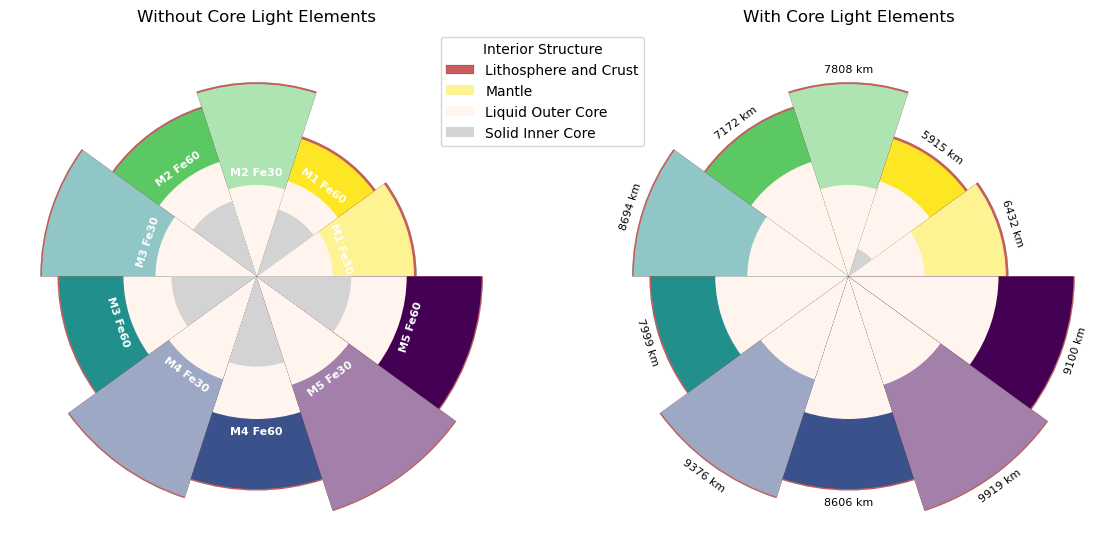

In [9]:
planets1, labels1 = load_data(profs, lbl)

# change this to load the data with core light elements
planets2, labels2 = load_data(profs, lbl2)

fig, ax = plt.subplots(1,2,figsize=(14, 8), subplot_kw={'aspect': 'equal'})

# Parameters
num_wedges = 10  # You want 10 wedges
theta_start = 0  # Start angle (degrees)
theta_extent = 360 / num_wedges  # Each wedge covers an equal angle
xlight = [0, 0.1053]
Rlid_ = np.array([100000, 100000, 72146, 72146, 59604, 59604, 52051, 52051, 46858, 46858])/1000
layers = ['Solid Inner Core', 'Liquid Outer Core', 'Mantle', 'Lithosphere and Crust']

for index, xi in enumerate(xlight):
    i = 0
    Rp_ = []
    angle = -theta_extent*2
    if index == 0:
        planets = planets1
        lbl = labels1
    else:
        planets = planets2
        lbl = labels2
    for key, lib in planets.items():
        
        Rp = lib['r'][0]/1000
        Rp_.append(Rp)

        ind = lib.loc[lib['phase'] == 8].index[0]
        Rc = lib['r'][ind]/1000

        # ToDo define Ric correctly!
        l = len(lib['P'])-1
        while l > 0:
            if lib['T'][l] < T_m2014(lib['P'][l],x_light=xi) and (lib['phase'][l] == 8):
                l -= 1
            else:
                break
        Ric = lib['r'][l]/1000
            
        Rlid = Rp-Rlid_[i]
        radi = [Rp, Rlid, Rc, Ric]

        for R in radi:
            k = i//2
            if R == Rp:
                if i == 0:
                    label = layers[3]
                else:
                    label = None
                c = 'indianred'
                line = 0.1
            elif R == Rlid and i % 2 != 0:
                if i == 0:
                    label = layers[2]
                else:
                    label = None
                c = clrs[k]
                line = 0
            elif R == Rlid and i % 2 == 0:
                if i == 0:
                    label = layers[2]
                else:
                    label = None
                c = lighten_color(clrs[k], 0.5)
                line = 0
            elif R == Rc:
                if i == 0:
                    label = layers[1]
                else:
                    label = None
                c = 'seashell'
                line = 0
                if index == 0:
                    ax[index].text((Rc+500)*np.cos(np.radians(theta_start+theta_extent/2)),
                                (Rc+500)*np.sin(np.radians(theta_start+theta_extent/2)),
                                lbl[i], fontsize=8, ha='center', va='center', color='white', weight='bold', rotation=angle)
                    
                else:
                    ax[index].text((500+Rp)*np.cos(np.radians(theta_start+theta_extent/2)),
                                (500+Rp)*np.sin(np.radians(theta_start+theta_extent/2)),
                                f'{round(Rp)} km', fontsize=8, ha='center', va='center', color='black', rotation=angle)  
            else:
                c = 'lightgrey'
                line = 0
                if i == 0:
                    label = layers[0]
                else:
                    label = None
            
            wedge = Wedge(center=(0, 0), r=R, theta1=theta_start, theta2=theta_start + theta_extent,
                        facecolor=c, edgecolor='black', lw=line, alpha=1, label=label)
            
            ax[index].add_patch(wedge)
            
        theta_start += theta_extent
        angle += theta_extent 
        if angle > 100:
            angle -= 180  
        i += 1

max_r = max(Rp_)

ttl = ('Without Core Light Elements','With Core Light Elements')
# Set plot limits to ensure all wedges are visible
for i in range(2):
    ax[i].set_title(ttl[i])
    ax[i].set_xlim(-max_r, max_r)
    ax[i].set_ylim(-max_r, max_r)
    ax[i].set_xlabel('X [km]')
    ax[i].set_ylabel('Y [km]')
    ax[i].axis('off')

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title='Interior Structure')
plt.savefig('planet_structure_rhoxi0.svg')